Passo a passo deste colab:

1. Importação de bibliotecas: Foram importadas as bibliotecas necessárias para a análise e visualização dos dados: matplotlib.pyplot, seaborn e pandas.
2. Carregamento dos dados: O arquivo CSV candy_production.csv foi carregado em um DataFrame pandas chamado candy.
3. Visualização inicial dos dados: As últimas 12 linhas do DataFrame foram exibidas para ter uma ideia da estrutura e dos dados mais recentes.
4. Conversão da coluna de data: A coluna observation_date foi convertida para o tipo datetime para permitir operações baseadas em tempo.
5. Verificação do tipo de dados: As informações do DataFrame foram exibidas para confirmar que a coluna observation_date foi convertida corretamente.
6. Plotagem inicial: Um gráfico inicial da produção industrial ao longo do tempo foi gerado para visualizar a série temporal completa.
7. Filtragem dos dados: Os dados foram filtrados para incluir apenas as observações a partir de '2010-01-01', criando um novo DataFrame chamado candy_filtered.
8. Visualização dos dados filtrados: As primeiras e últimas linhas do DataFrame filtrado foram exibidas.
9. Plotagem dos dados filtrados: Um gráfico da produção industrial foi gerado com os dados filtrados, com um tamanho maior para melhor visualização.
10. Adição de linhas verticais: Linhas verticais foram adicionadas ao gráfico para marcar o início de cada ano, facilitando a identificação de padrões anuais.
11. Decomposição da série temporal: A coluna observation_date foi definida como índice do DataFrame filtrado. Em seguida, a série temporal foi decomposta em suas componentes de tendência, sazonalidade e resíduo usando o modelo multiplicativo.
12. Plotagem da decomposição: Os gráficos resultantes da decomposição (observado, tendência, sazonalidade e resíduo) foram exibidos para visualizar cada componente separadamente.

Dataset usado: [candy_production.csv](https://drive.google.com/file/d/1FlZ2yllILVN7vRSpz31r8k5bsIgh-70U/view?usp=sharing)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
candy = pd.read_csv('candy_production.csv')

In [ ]:
candy.tail(12)

,observation_date,industrial_production
536,2016-09-01,109.3191
537,2016-10-01,119.0502
538,2016-11-01,116.8431
539,2016-12-01,116.4535
540,2017-01-01,109.4666
541,2017-02-01,113.4661
542,2017-03-01,105.2245
543,2017-04-01,107.4288
544,2017-05-01,101.9209
545,2017-06-01,104.2022


In [ ]:
candy['observation_date'] = pd.to_datetime(candy['observation_date'])

In [ ]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   observation_date       548 non-null    datetime64[ns]
 1   industrial_production  548 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.7 KB


<Axes: xlabel='observation_date'>

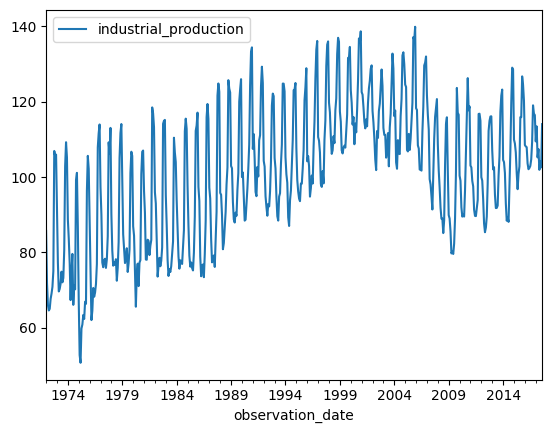

In [ ]:
candy.plot(x='observation_date', y='industrial_production')

In [ ]:
candy_filtered = candy[candy['observation_date']>= '2010-01-01']

In [ ]:
candy_filtered

,observation_date,industrial_production
456,2010-01-01,100.3797
457,2010-02-01,99.0155
458,2010-03-01,91.9654
459,2010-04-01,89.4914
460,2010-05-01,89.9713
...,...,...
543,2017-04-01,107.4288
544,2017-05-01,101.9209
545,2017-06-01,104.2022
546,2017-07-01,102.5861


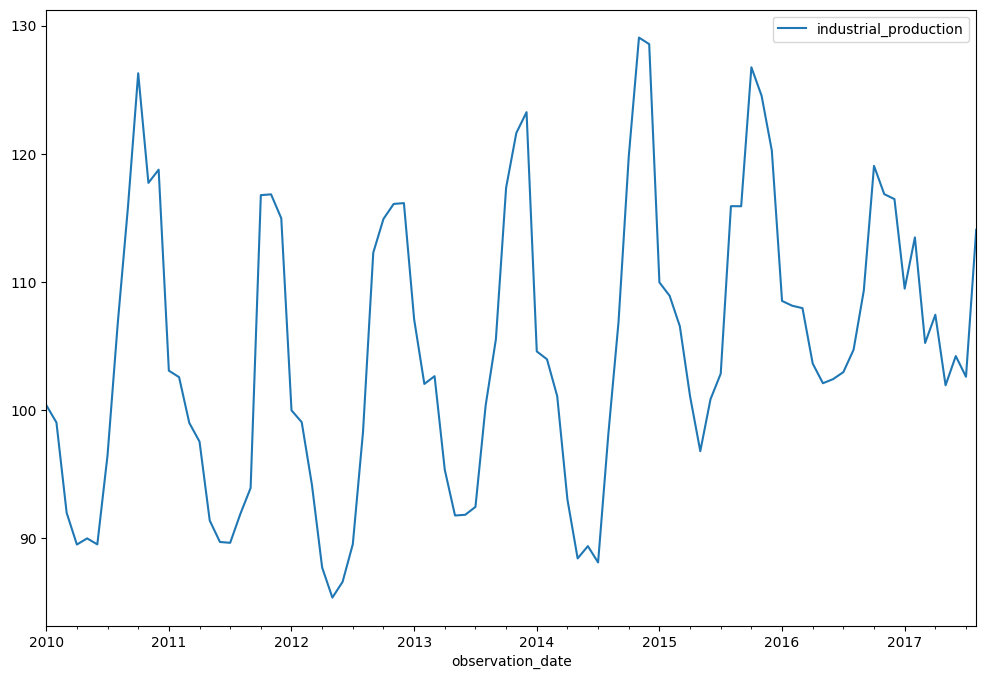

In [ ]:
ax = candy_filtered.plot(x='observation_date', y='industrial_production', figsize=(12,8))


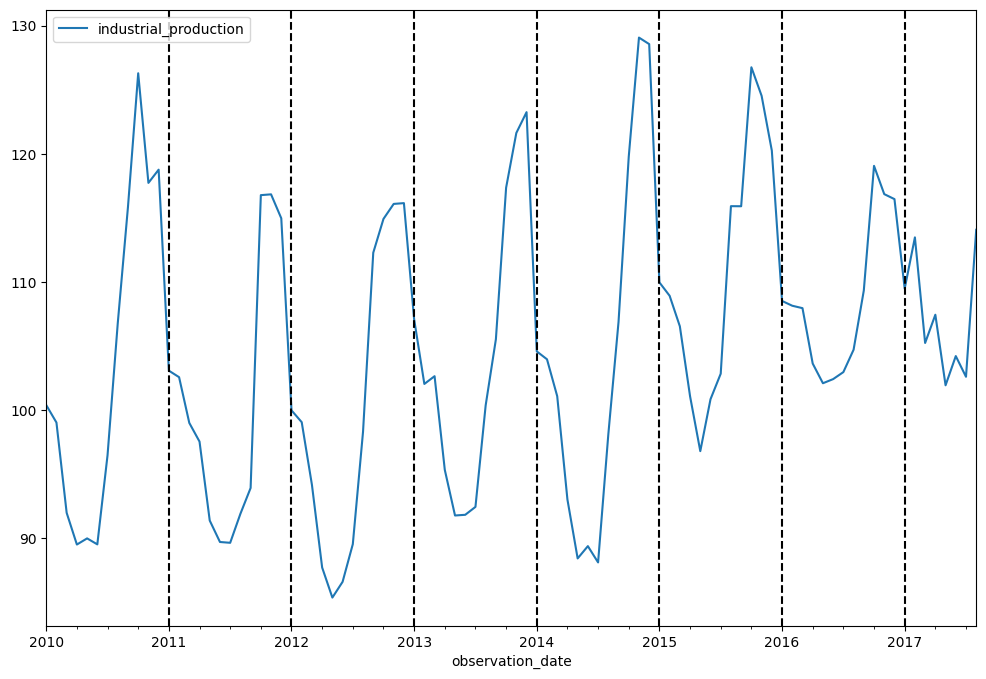

In [ ]:
ax = candy_filtered.plot(x='observation_date', y='industrial_production', figsize=(12,8))
xcoords = ['2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01']

for xc in xcoords:
  plt.axvline(x=xc, color='black', linestyle='--')


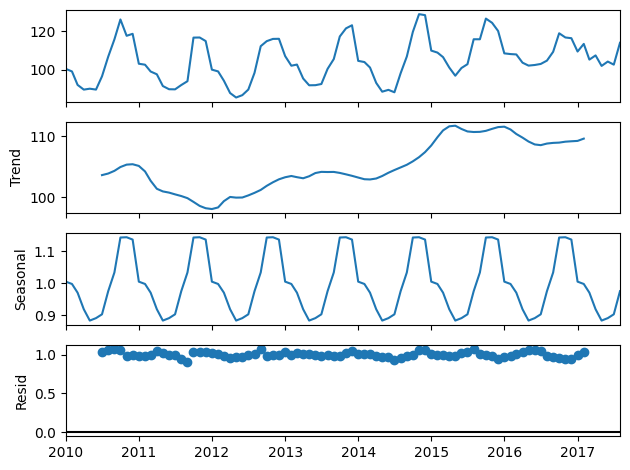

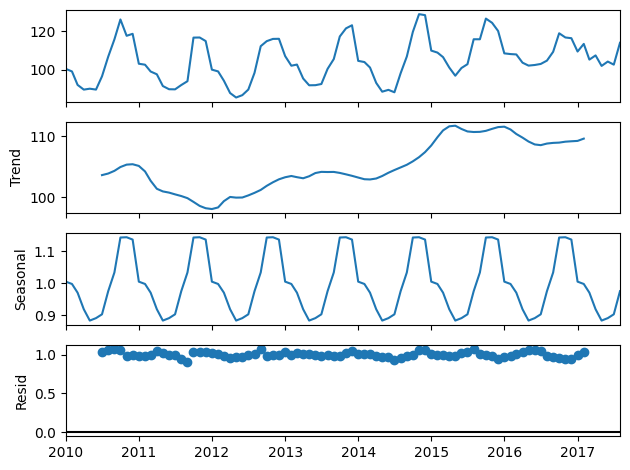

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

candy_filtered.set_index('observation_date', inplace=True)

analysis = candy_filtered[['industrial_production']].copy()

decompose_result = seasonal_decompose(analysis, model='multiplicative')

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot()